<a href="https://colab.research.google.com/github/touhid0503/Machine-Learning-Full-Course-with-Scikit-Learn/blob/main/26_02_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression using Scikit-Learn

In [1]:
from sklearn.linear_model import LinearRegression

In [2]:
model=LinearRegression()

In [3]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [4]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianHQ/notebooks/refs/heads/main/machine-learning-with-python-zero-to-gbms/lesson-1-linear-regression-with-scikit-learn/medical-charges.csv'

In [5]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7a19f9154aa0>)

In [6]:
import pandas as pd

In [7]:
medical_df = pd.read_csv('medical.csv')

In [9]:
medical_df.sample(5)

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.210,0,no,southeast,1121.87390
942,18,female,40.185,0,no,northeast,2217.46915
1269,45,male,27.500,3,no,southwest,8615.30000
1013,48,male,32.300,1,no,northwest,8765.24900
84,37,female,34.800,2,yes,southwest,39836.51900


In [15]:
medical_df.shape

(1338, 7)

In [10]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [16]:
non_smoker_df.sample(5)

,age,sex,bmi,children,smoker,region,charges
528,46,male,39.425,1,no,northeast,8342.90875
908,63,male,39.800,3,no,southwest,15170.06900
866,18,male,37.290,0,no,southeast,1141.44510
1289,44,male,34.320,1,no,southeast,7147.47280
32,19,female,28.600,5,no,southwest,4687.79700


In [14]:
non_smoker_df.shape

(1064, 7)

In [19]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df['charges']
print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


In [27]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 1 to 1336
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     1064 non-null   int64
dtypes: int64(1)
memory usage: 16.6 KB


In [28]:
inputs.describe()

,age
count,1064.000000
mean,39.385338
std,14.083410
min,18.000000
25%,26.750000
50%,40.000000
75%,52.000000
max,64.000000


In [29]:
inputs.head()

,age
1,18
2,28
3,33
4,32
5,31


In [20]:
inputs.ndim

2

In [21]:
model.fit(inputs,targets)

LinearRegression()

In [22]:
import numpy as np

In [24]:
model.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [25]:
predictions=model.predict(inputs)

In [26]:
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [31]:
def rmse(targets, predictions):
    return np.sqrt(np.mean((targets - predictions)**2))

print(f"RMSE: {rmse(targets, predictions):.2f}")

RMSE: 4662.51


In [32]:
model.coef_

array([267.24891283])

In [33]:
model.intercept_

np.float64(-2091.4205565650864)

In [37]:
import matplotlib.pyplot as plt

In [39]:
def estimate_charges(age, w, b):
    return w * age + b

In [40]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

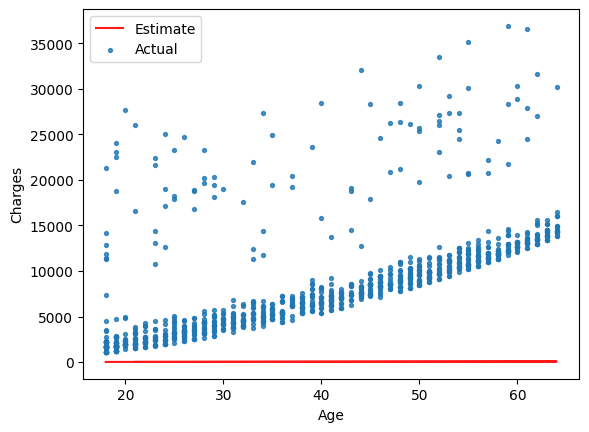

In [41]:
try_parameters(1,2)

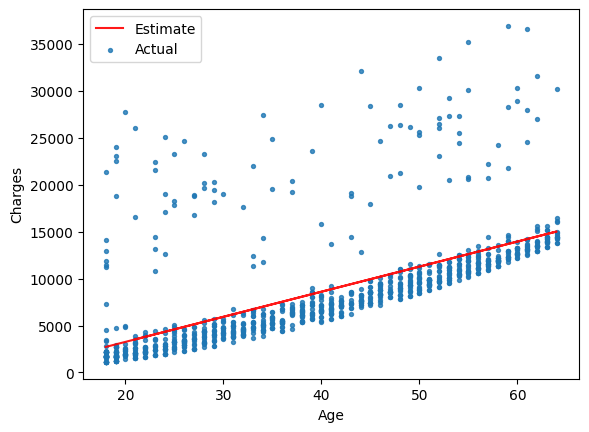

In [42]:
try_parameters(model.coef_,model.intercept_)